# Smart Home Plus Assets Analysis
Analysis of household device data by manufacturer and distribution patterns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define a custom Telus-inspired color palette
telus_palette = ["#4B286D",  # Telus Purple
                 "#66BF87",  # Telus Green
                 "#A0A0A0",  # Neutral Gray
                 "#F5F5F5",  # Light Gray
                 "#000000"]  # Black for contrast

# Set the custom palette in Seaborn
sns.set_palette(sns.color_palette(telus_palette))

# Set a clean style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")

In [2]:
# Load and explore the data
data = pd.read_csv('asset_data_18092025.csv')
print("Dataset Info:")
data.info()
print("\nDataset Description:")
data.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24197 entries, 0 to 24196
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   household_id      24197 non-null  object
 1   asset_id          24197 non-null  object
 2   alias             24195 non-null  object
 3   asset_status      24197 non-null  bool  
 4   asset_type        24197 non-null  object
 5   created_ts        24197 non-null  object
 6   device_groups     24194 non-null  object
 7   hub_id            859 non-null    object
 8   last_updated_by   16078 non-null  object
 9   last_updated_ts   24197 non-null  object
 10  manufacturer      24197 non-null  object
 11  firmware_version  23934 non-null  object
 12  serial_number     24197 non-null  object
 13  soft_deleted      24197 non-null  bool  
 14  asset_disco_ts    2027 non-null   object
dtypes: bool(2), object(13)
memory usage: 2.4+ MB

Dataset Description:


,household_id,asset_id,alias,asset_status,asset_type,created_ts,device_groups,hub_id,last_updated_by,last_updated_ts,manufacturer,firmware_version,serial_number,soft_deleted,asset_disco_ts
count,24197,24197,24195,24197,24197,24197,24194,859,16078,24197,24197,23934,24197,24197,2027
unique,14064,21757,4942,1,11,22149,15621,222,4,22793,9,47,21698,2,1515
top,01JKVRNR29PTJW5Q321AHQDJSH,db-C0F53587DE88,Outdoor Camera,True,telus.d.outdoorcamera,2025-09-15 05:36:32.000000 UTC,"[""ab0a6711-5e1b-41f6-8ed8-a88895b3089c""]",iq4-354844453203120,deviceOnboarding,2025-07-20 16:02:07.875000 UTC,1P,0.03.553,DCF00BV24222000193,False,2025-07-30 11:08:42.570097 UTC
freq,253,31,4629,24197,9578,4,126,79,14429,26,18332,4343,31,24192,45


In [3]:
# Filter out 1P and JCI brands as requested
filtered_data = data[~data['manufacturer'].isin(['1P', 'JCI'])]
print(f"Original dataset size: {len(data)}")
print(f"Filtered dataset size: {len(filtered_data)}")
print(f"\nRemaining manufacturers: {sorted(filtered_data['manufacturer'].unique())}")

Original dataset size: 24197
Filtered dataset size: 4462

Remaining manufacturers: ['3P', 'Honeywell', 'Resideo', 'Ring', 'Sensi', 'Sinope', 'TP-Link']


Devices per Manufacturer:
manufacturer
TP-Link      3986
Honeywell     221
Sinope        134
Sensi          98
Resideo        10
Ring            9
3P              4
Name: count, dtype: int64


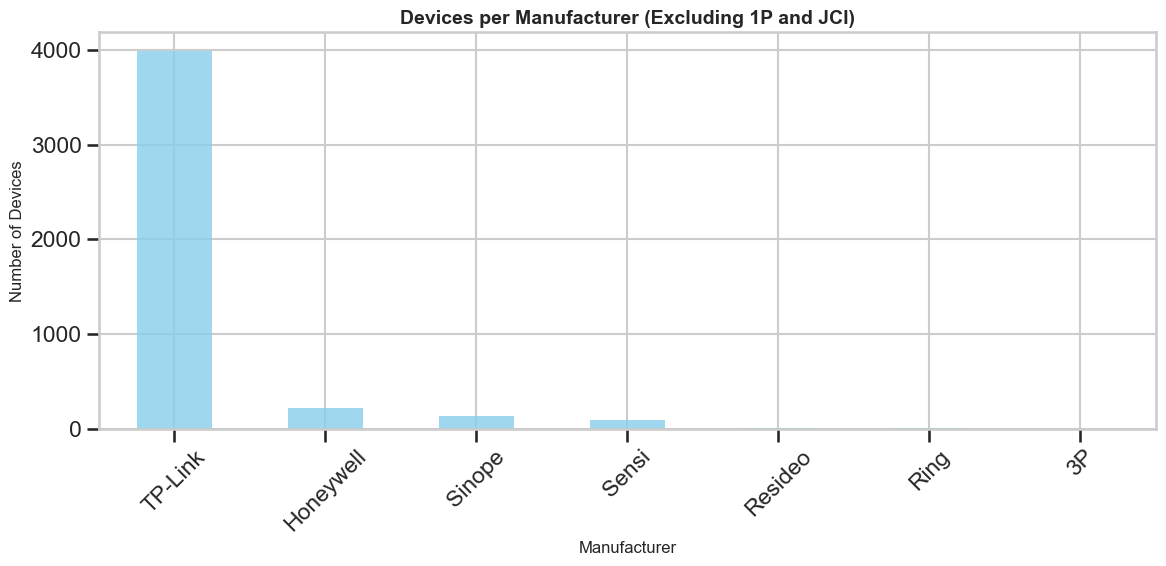

In [4]:
# Chart 1: Devices per Manufacturer (Excluding 1P and JCI)
manufacturer_counts = filtered_data['manufacturer'].value_counts()
print("Devices per Manufacturer:")
print(manufacturer_counts)

plt.figure(figsize=(12, 6))
manufacturer_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Devices per Manufacturer (Excluding 1P and JCI)', fontsize=14, fontweight='bold')
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Number of Devices', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Households per Brand:
manufacturer
TP-Link      763
Honeywell    151
Sensi         49
Sinope        45
Resideo       10
Ring           8
3P             3
Name: household_id, dtype: int64


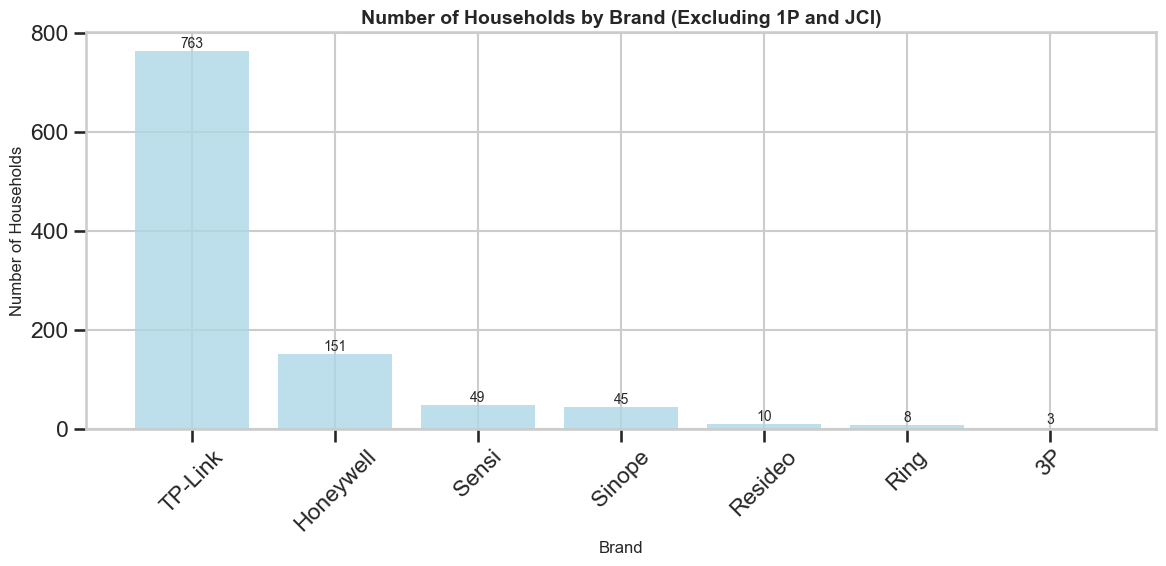

In [5]:
# Chart 2: NEW - Households by Brand (Main requested chart)
# Count unique households per manufacturer
households_per_brand = filtered_data.groupby('manufacturer')['household_id'].nunique().sort_values(ascending=False)
print("Households per Brand:")
print(households_per_brand)

plt.figure(figsize=(12, 6))
bars = plt.bar(households_per_brand.index, households_per_brand.values, color='lightblue', alpha=0.8)
plt.title('Number of Households by Brand (Excluding 1P and JCI)', fontsize=14, fontweight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Households', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Households with Single Manufacturer:
manufacturer
TP-Link      602
Honeywell     41
Sensi         22
Sinope        12
3P             3
Name: count, dtype: int64


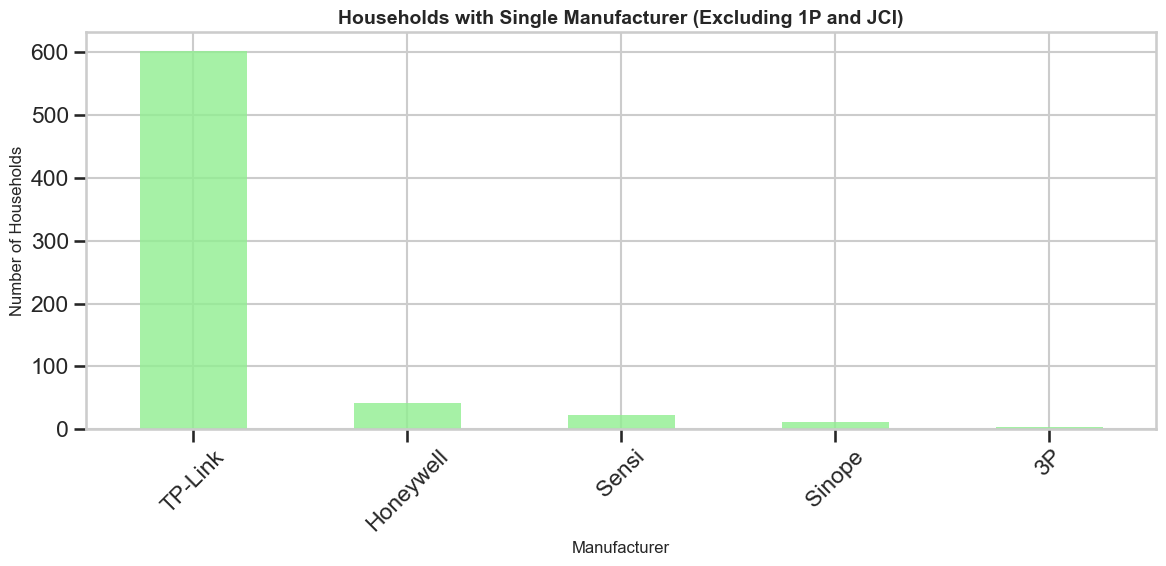

In [6]:
# Chart 3: Households with Single Manufacturer
household_groups = filtered_data.groupby('household_id')['manufacturer'].unique()
single_manufacturer_households = household_groups[household_groups.apply(len) == 1]
single_manufacturer_counts = single_manufacturer_households.apply(lambda x: x[0]).value_counts()

print("Households with Single Manufacturer:")
print(single_manufacturer_counts)

plt.figure(figsize=(12, 6))
single_manufacturer_counts.plot(kind='bar', color='lightgreen', alpha=0.8)
plt.title('Households with Single Manufacturer (Excluding 1P and JCI)', fontsize=14, fontweight='bold')
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Number of Households', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Chart 4: Clustering Analysis - 3P Devices per Household
# Prepare data for clustering (household size, number of devices per manufacturer)
cluster_data = filtered_data.groupby('household_id').agg({
    'manufacturer': 'count',
    'asset_type': 'nunique'
}).reset_index()

# Normalize the data for clustering
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data[['manufacturer', 'asset_type']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Count the number of households in each cluster
cluster_counts = cluster_data['Cluster'].value_counts().sort_index()
print("Households per Cluster:")
print(cluster_counts)

Households per Cluster:
Cluster
0    553
1    286
2      3
Name: count, dtype: int64


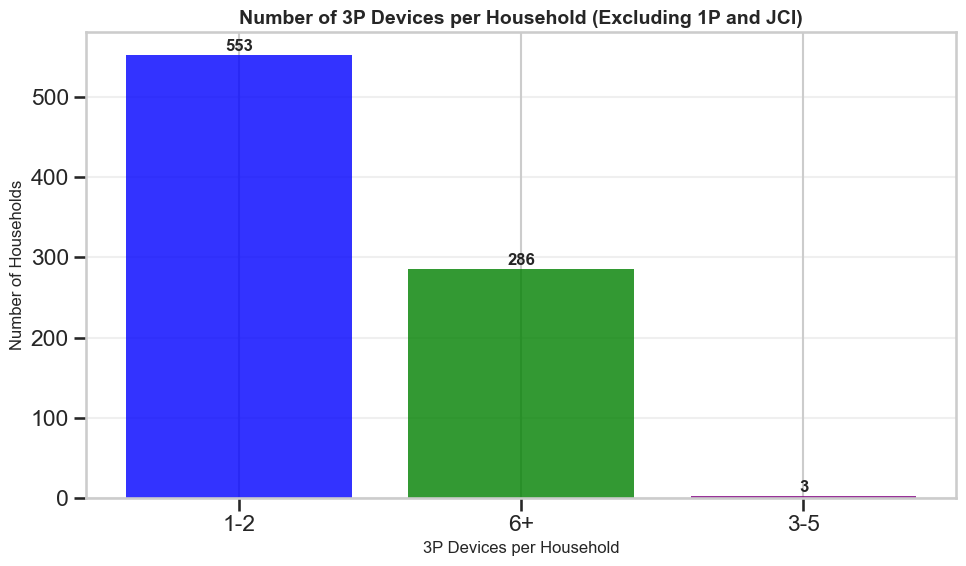

In [8]:
# Plot the clustering results
plt.figure(figsize=(10, 6))
bars = plt.bar(
    cluster_counts.index, 
    cluster_counts.values, 
    color=['blue', 'green', 'purple'], 
    alpha=0.8
)

# Add labels to the bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 4, 
        str(int(bar.get_height())), 
        ha='center', 
        fontsize=12,
        fontweight='bold'
    )

# Add axis labels and title with capitalized 3P and 1P
plt.xlabel('3P Devices per Household', fontsize=12)
plt.ylabel('Number of Households', fontsize=12)
plt.title('Number of 3P Devices per Household (Excluding 1P and JCI)', fontsize=14, fontweight='bold')
plt.xticks(cluster_counts.index, ['1-2', '6+', '3-5'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
# Summary Statistics
print("=== SUMMARY STATISTICS ===")
print(f"Total households analyzed: {filtered_data['household_id'].nunique()}")
print(f"Total 3P devices: {len(filtered_data)}")
print(f"Average devices per household: {len(filtered_data) / filtered_data['household_id'].nunique():.2f}")
print(f"Number of manufacturers: {filtered_data['manufacturer'].nunique()}")
print(f"Most popular brand by households: {households_per_brand.index[0]} ({households_per_brand.iloc[0]} households)")
print(f"Most popular brand by devices: {manufacturer_counts.index[0]} ({manufacturer_counts.iloc[0]} devices)")

=== SUMMARY STATISTICS ===
Total households analyzed: 842
Total 3P devices: 4462
Average devices per household: 5.30
Number of manufacturers: 7
Most popular brand by households: TP-Link (763 households)
Most popular brand by devices: TP-Link (3986 devices)
